# ***imports***

In [ ]:
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
import keras
from keras.utils import to_categorical
from keras.datasets import mnist

# ***Huda dataset***

In [ ]:
from matplotlib import pyplot as plt
from HodaDatasetReader import read_hoda_cdb, read_hoda_dataset
X_train, Y_train = read_hoda_dataset(dataset_path='/content/Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=True)





# ***normalization***

In [ ]:
x_train = np.array(X_train)
y_train = np.array(Y_train)
#x_test = np.array(X_test)
#y_test = np.array(Y_test)

x_train = X_train.reshape(60000, 1024).astype("float32") / 255
#x_test = X_test.reshape(20000, 1024).astype("float32") / 255


# ***mnist dataset***

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

11493376/11490434 [==============================] - 0s 0us/step


# ***Fully connected***

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=1024))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# ***Optimizer***

In [ ]:
model.compile(
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=5,
)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9025 - sparse_categorical_accuracy: 0.7608
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1922 - sparse_categorical_accuracy: 0.9441
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1531 - sparse_categorical_accuracy: 0.9577
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1302 - sparse_categorical_accuracy: 0.9645
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1131 - sparse_categorical_accuracy: 0.9691


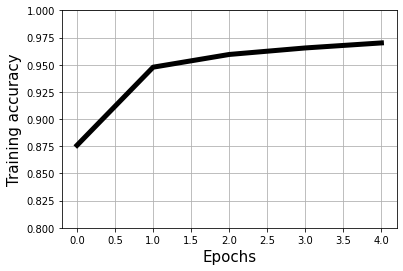

In [ ]:
history.history

plt.plot(history.history['sparse_categorical_accuracy'],c='k',lw=5)
plt.grid(True)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.ylim(0.8,1.0)
plt.show()

# ***Test evaluate***

In [ ]:
print("test data")
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)


test data
625/625 [==============================] - 1s 1ms/step - loss: 0.2121 - sparse_categorical_accuracy: 0.9376
test loss, test acc: [0.21208599209785461, 0.9375500082969666]


In [ ]:
model.save('mnist.h5')

In [ ]:
from keras.models import load_model
model = load_model('mnist.h5')